使用python 实现线性回归算法。
向量运算使用numpy

核心数学公式
<img src="./images/functions.PNG" />


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np

class LogisticRegression:
    def __init__(self):
        self.theta_ = None

    def sigmoid(slef,z):
        return 1.0/(1+np.exp(-z))

    # 预测函数
    def hypothesis(self, X, theta):
        return self.sigmoid(np.dot(X, theta))
    
    # 损失函数（交叉熵损失）    
    def computerCost(self,X,y,theta):
        m = len(y)
        lost = -1 * y * np.log(self.hypothesis(X,theta)) - (1 - y) * np.log(1 - self.hypothesis(X,theta))
        return (1/m) * np.sum(lost)
    
    # 梯度下降算法
    def gradientDescent(self,X, y, theta, alpha, num_iters):
        m = len(y)
        X = np.hstack((np.ones((m, 1)), X))
        theta = self.theta
        for i in range(num_iters):
            for j in range(len(theta)):
                theta[j] = theta[j] - (alpha / m) * np.sum((self.hypothesis(X, theta) - y) * X[:, j].reshape(-1, 1))
            if i % 10000 == 0:
                print("Iteration: ", i, " Cost: ", self.computerCost(X, y, theta))

        return theta

    
    def fit(self, X, y,  alpha=0.01, num_iters=10000):
        n = X.shape[1]
        # init parameters
        self.theta =  np.zeros(n+1).reshape(n+1,1)

        # gradient descent
        self.theta = self.gradientDescent(X, y,self.theta,alpha,num_iters)

        return self    


    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0],1)),X))
        h =  self.hypothesis(X,self.theta)
        h[h>=0.5] = 1
        h[h<0.5] = 0
        return h

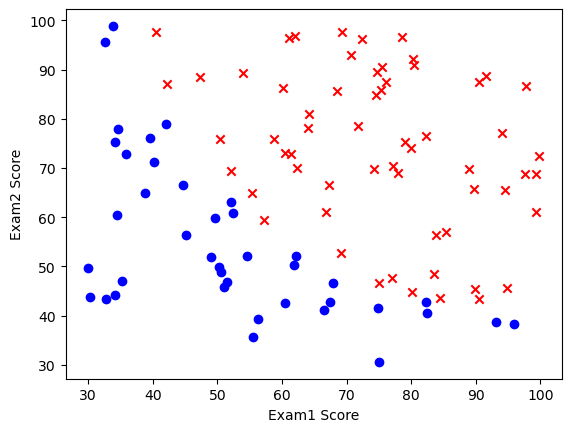

In [3]:
def load_data():
    # 加载数据
    data = np.loadtxt('data/logistic/data1.txt', delimiter=',')
    n = data.shape[1] -1
    X = data[:, :n]
    y = data[:, -1].reshape(-1, 1)
    return X, y
def plot(X,y):
    pos = np.where(y==1)
    neg = np.where(y==0)
    plt.scatter(X[pos[0],0],X[pos[0],1],color='red',marker='x')
    plt.scatter(X[neg[0],0],X[neg[0],1],color='blue',marker='o')
    plt.xlabel('Exam1 Score')
    plt.ylabel('Exam2 Score')
    plt.show()
X,y = load_data()
plot(X,y)

In [4]:
iterations = 250000
alpha = 0.01
model = LogisticRegression()
#training the model
model.fit(X, y, alpha, iterations)


Iteration:  0  Cost:  4.443752281940678
Iteration:  10000  Cost:  1.5473637712317339
Iteration:  20000  Cost:  2.5056966073535034
Iteration:  30000  Cost:  1.5453396699239448
Iteration:  40000  Cost:  1.2114098277484258
Iteration:  50000  Cost:  1.1108903667629928
Iteration:  60000  Cost:  0.7772911793773929
Iteration:  70000  Cost:  0.5950442740298716
Iteration:  80000  Cost:  0.5413565620462807
Iteration:  90000  Cost:  0.5102151884677741
Iteration:  100000  Cost:  0.5158487458413137
Iteration:  110000  Cost:  0.4481620442053134
Iteration:  120000  Cost:  0.45171097791772064
Iteration:  130000  Cost:  0.3131677236357695
Iteration:  140000  Cost:  0.3495068229993231
Iteration:  150000  Cost:  0.28856150593084967
Iteration:  160000  Cost:  0.287894790307886
Iteration:  170000  Cost:  0.25807396355466117
Iteration:  180000  Cost:  0.2659189109234025
Iteration:  190000  Cost:  0.2616148688285939
Iteration:  200000  Cost:  0.2617775111605863
Iteration:  210000  Cost:  0.2569098565548266
I

In [5]:
#show the prediction result of the logistic regression model
y_pred = model.predict(X)
print("准确率为：", accuracy_score(y, y_pred))

准确率为： 0.91


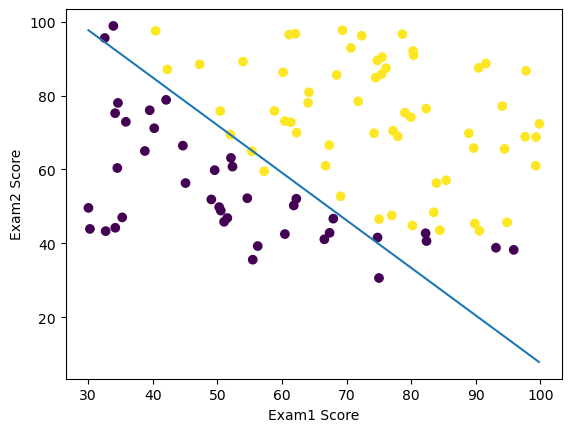

In [6]:
def plotDescisionBoundary(X, y, theta):
    plt.scatter(X[:,0], X[:,1], c=y)
    x1 = np.arange(min(X[:,0]), max(X[:,0]), 0.1)
    x2 = (-1/theta[2])*(theta[1]*x1 + theta[0])
    plt.plot(x1, x2)
    plt.xlabel('Exam1 Score')
    plt.ylabel('Exam2 Score')
    plt.show()

plotDescisionBoundary(X, y, model.theta)